# Q1

باید برای هر تیم مجموع امتیازات به دست آورده در هر مسابقه را حساب کرده و سپس قهرمان هر فصل را مشخص کنیم بعد تعداد قهرمانی هر تیم را محاسبه کرده و وارد نمودار میکنیم
(تیم هایی که تا حالا قهرمانی نداشتند در نمودار نیستند)

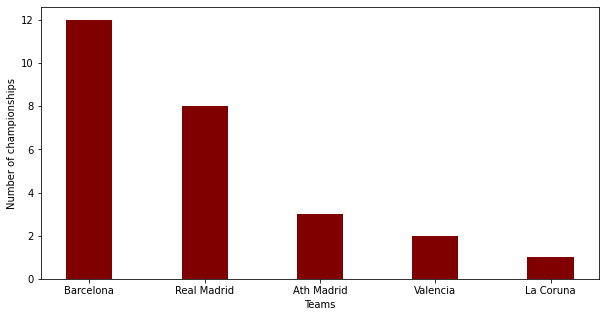

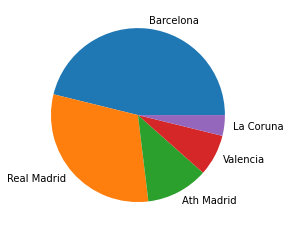

,Season,Teams,PTS,Difference
0,1995-96,Ath Madrid,87,-1
1,1996-97,Real Madrid,92,33
2,1997-98,Barcelona,74,16
3,1998-99,Barcelona,79,14
4,1999-2000,La Coruna,69,34
5,2000-01,Real Madrid,80,35
6,2001-02,Valencia,75,16
7,2002-03,Real Madrid,78,16
8,2003-04,Valencia,77,0
9,2004-05,Barcelona,84,12


In [20]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("LaLiga_Matches_1995-2021.csv")

# compare function for face to face games
def compare(first_team,second_team,teams,tb,games):
            
            first_team_result = 0
            second_team_result = 0
            
            # Search for games hosted by the first team
            f_ftfg = games.loc[(games['HomeTeam'] == first_team) & (games['AwayTeam'] == second_team)]
            
             # Conditions for determining the winning team
            if 'A' in f_ftfg.values :
                first_team_result += 1
            elif  'H' in f_ftfg.values:
                second_team_result += 1
            elif 'D' in f_ftfg.values:
                second_team_result += 0
                first_team_result += 0
                
            else:
                pass

            
            
            # Search for games hosted by the second team
            s_ftfg = games.loc[(games['HomeTeam'] == second_team) & (games['AwayTeam'] == first_team)]
            
            # Conditions for determining the winning team
            if 'A' in s_ftfg.values:
                second_team_result += 1
            elif 'H' in s_ftfg.values:
                first_team_result += 1
            elif 'D' in s_ftfg.values:
                second_team_result += 0
                first_team_result += 0
                pass
            else:
                pass

            # Compare result
            if first_team_result > second_team_result:
                teams.remove(first_team)
            elif first_team_result < second_team_result:
                teams.remove(second_team)
                
            # if their result was equal,check differences
            elif first_team_result == second_team_result:      
                ft_difference = tb.loc[(tb['Teams'] == first_team)]['Difference']
                st_difference = tb.loc[(tb['Teams'] == second_team)]['Difference']    
                if ft_difference.values > st_difference.values:
                    teams.remove(second_team)
                elif ft_difference.values < st_difference.values:
                    teams.remove(first_team)
                else:
                    pass
            else:
                pass
            # Return the winning team
            return teams

def champ_in_each_season():
    champs = []
    seasons = df.Season.unique().tolist()
    
    # Search in each season
    for season in seasons:
        data = {}
        PTS = []
        Difference = []
        
        # Getting games for each season
        games = df.loc[df['Season'] == str(season)]
        
        # Getting teams for each season
        teams = games['HomeTeam'].unique().tolist()
        teams.sort()
        
        # compute for ranking
        for team in teams:
            
            scores = 0
            home_games = games.loc[games['HomeTeam'] == team]
            guest_games = games.loc[games['AwayTeam'] == team]
            FTHG = sum(home_games['FTHG']) + sum(guest_games['FTHG'])
            FTAG = sum(home_games['FTAG']) + sum(guest_games['FTAG'])
            difference = FTHG - FTAG
            
            # Three points for each wining game at home or away.
            # One point to equalize.
            scores += (len(home_games.loc[home_games['FTR'] == 'H'])) * 3
            scores += len(home_games.loc[home_games['FTR'] == 'D']) 
            scores += (len(guest_games.loc[guest_games['FTR'] == 'A'])) * 3
            scores += len(guest_games.loc[guest_games['FTR'] == 'D'])
            PTS.append(scores)
            Difference.append(difference)
           
        # data for creating new dataframe
        data = {
        'Season': season,
        'Teams': teams,
        'PTS': PTS,
        'Difference': Difference,
        }
        
        # index for ranking start from 1 to lenght of teams in each season
        index = [x for x in range(1,len(teams)+1)]
        
        tb = pd.DataFrame(data,index=index)  
        tb.reset_index(drop=True)
        tb = tb.sort_values(by=['PTS','Difference'],ascending=False)
        tb['rank'] = index
        tb.set_index('rank')
        
        # Search for highest point to check the same points for first place
        highest_point = tb.iloc[0]['PTS']
        
        # Teams have equal points with all info
        Equal_in_points = tb.loc[(tb['PTS'] == highest_point)]
        
        # compare teams
        # conditions are for check the same team in points in list
        if len(Equal_in_points) == 1:
            # if true the champion is determined
            champs.append(tb.iloc[0])
        else:
            
            # this list just contains name of teams
            teams = Equal_in_points['Teams'].unique().tolist()
            
            # Repeat comparison
            for i in range(len(teams)-(1)):
                winner_team = compare(first_team=teams[0],second_team=teams[1],teams=teams,tb=tb,games=games)
                # after comaring If the list size was equal to one, champion is specified
                if len(teams) == 1 :
                     
                    team =winner_team[0]
                    tb.sort_values(by=['rank'],ascending=False)
                    get_rank = tb.loc[tb['Teams'] == team,'rank'].tolist()
                    get_rank = get_rank[0]
                    get_index = tb.index[tb['rank'] == get_rank ].tolist()
                    index = get_index[0]
                    
                    
                    champs.append(tb.iloc[get_rank-1])
                    
    
    # for appending in new Dataframe
    season = []
    teams = []
    PTS = []
    Difference = []
    for i in range(0,26):
        season.append(champs[i][0])
        teams.append(champs[i][1])
        PTS.append(champs[i][2])
        Difference.append(champs[i][3])
        
        
      
    data = {
        'Season': season,
        'Teams': teams,
        'PTS': PTS,
        'Difference': Difference,
        }

    
     
    DataFrame = pd.DataFrame(data)
    # Sorting according to season from 1995 to 2021
    DataFrame = DataFrame.sort_values(by=['Season'],ascending=True)
    
    # teams with Number of championships 
    list_of_teams_championship =  DataFrame['Teams'].value_counts()
    list_of_teams_championship = list_of_teams_championship.reset_index().values.tolist()
    teams = []
    number_of_champs = []
    
    # looping for sperading teams and number of championship for ploting
    for i in list_of_teams_championship:
        teams.append(i[0])
        number_of_champs.append(i[1])
    # Bar graph
    fig = plt.figure(figsize = (10, 5))
    plt.bar(teams, number_of_champs, color ='maroon',
        width = 0.4)
    plt.xlabel("Teams")
    plt.ylabel("Number of championships")
    plt.show()
    
    # Pie chart
    plt.pie(number_of_champs, labels = teams)
    plt.show()   
    
    return DataFrame


champ_in_each_season()


# Q2

از تابعی استفاده میکنیم که در اخر لیستی از رنک تیم رئال مادرید در هر فصل میدهد بعد با توجه به سیزن ها و رنک ها نمودار رسم میشود

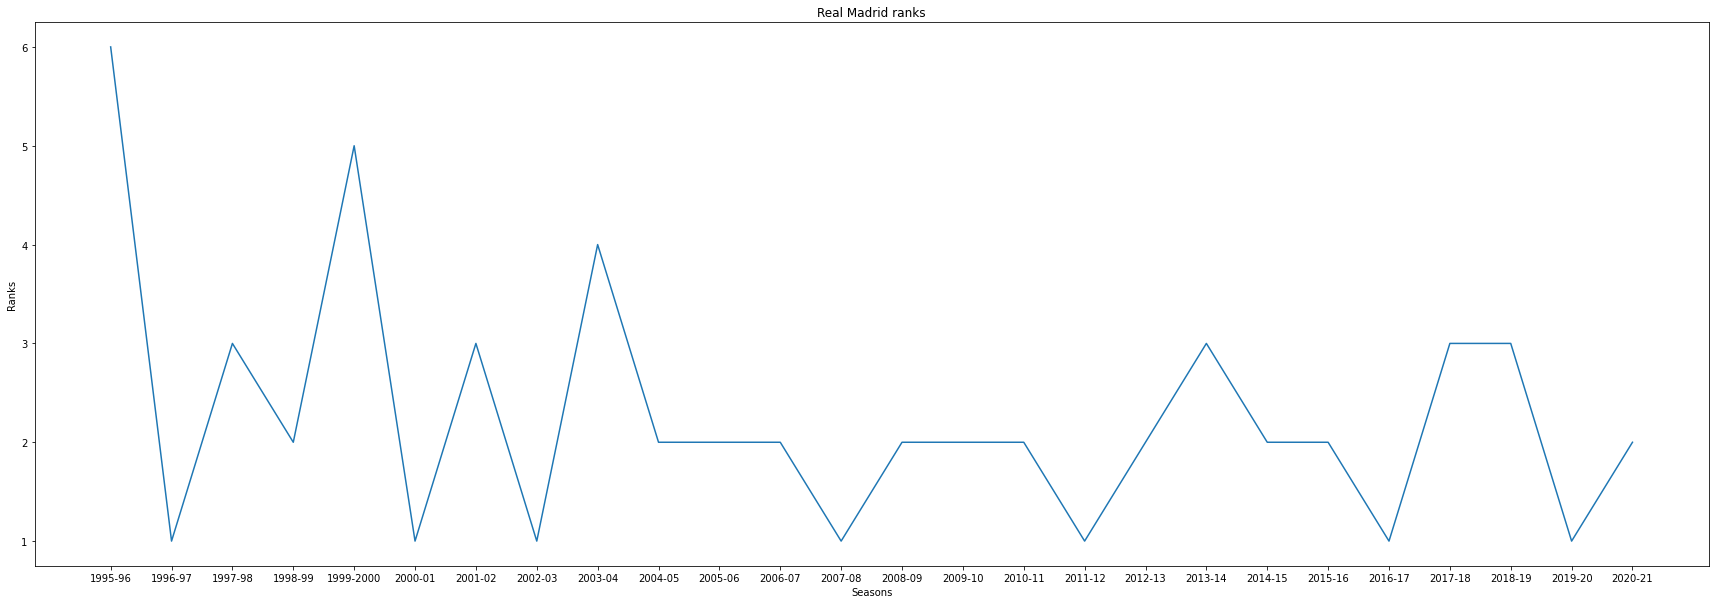

In [21]:
# define a function 

data = df
def Real_in_each_season() :
    ranks = []
    seasons = data.Season.unique().tolist()
    
    for season in seasons :
        df = {}
        df2 = {}
        # scores
        PTS = []
        # difference
        Difference = []
        # for sort by score for each match
        winner = []
        # getting games for each season
        games = data.loc[data['Season'] == str(season)]
        # Getting teams for each season
        teams = games['HomeTeam'].unique().tolist()
        teams.sort()
        # compute for ranking
        for team in teams:
            
            scores = 0
            home_games = games.loc[games['HomeTeam'] == team]
            guest_games = games.loc[games['AwayTeam'] == team]
            FTHG = sum(home_games['FTHG']) + sum(guest_games['FTHG'])
            FTAG = sum(home_games['FTAG']) + sum(guest_games['FTAG'])
            difference = FTHG - FTAG
            # Three points for each wining game at home or away.
            # One point to equalize.
            scores += (len(home_games.loc[home_games['FTR'] == 'H'])) * 3
            scores += len(home_games.loc[home_games['FTR'] == 'D']) 
            scores += (len(guest_games.loc[guest_games['FTR'] == 'A'])) * 3
            scores += len(guest_games.loc[guest_games['FTR'] == 'D'])
            PTS.append(scores)
            Difference.append(difference)
            
        df = {
        'Season': season,
        'Teams': teams,
        'PTS': PTS,
        'Difference': Difference,
        }
        tb = pd.DataFrame(df)     
        tb = tb.sort_values(by=['PTS','Difference'],ascending=False)
        arr = tb.loc[:,'Teams'].tolist()
        ranks.append(arr.index("Real Madrid") + 1)
    return ranks
    
    
if __name__ == '__main__':
    ranks = Real_in_each_season()

    seasons = data.Season.unique().tolist()
    rankOfReal = ranks
    fig = plt.figure(figsize = (30, 10))
    plt.plot(seasons, ranks)
    plt.title('Real Madrid ranks')
    plt.xlabel('Seasons')
    plt.ylabel('Ranks')
    plt.show()

# Q2'

حل سوال دو در صورتی که رئال مادرید در فصل 2006-2007 قهرمان شود (در نظر گرفتن بازی های رودررو)
روند حل سوال و تابع اصلی کاملا مشابه سوال اول است با این تفاوت که نمودار رنک رئال مادرید را رسم میکند

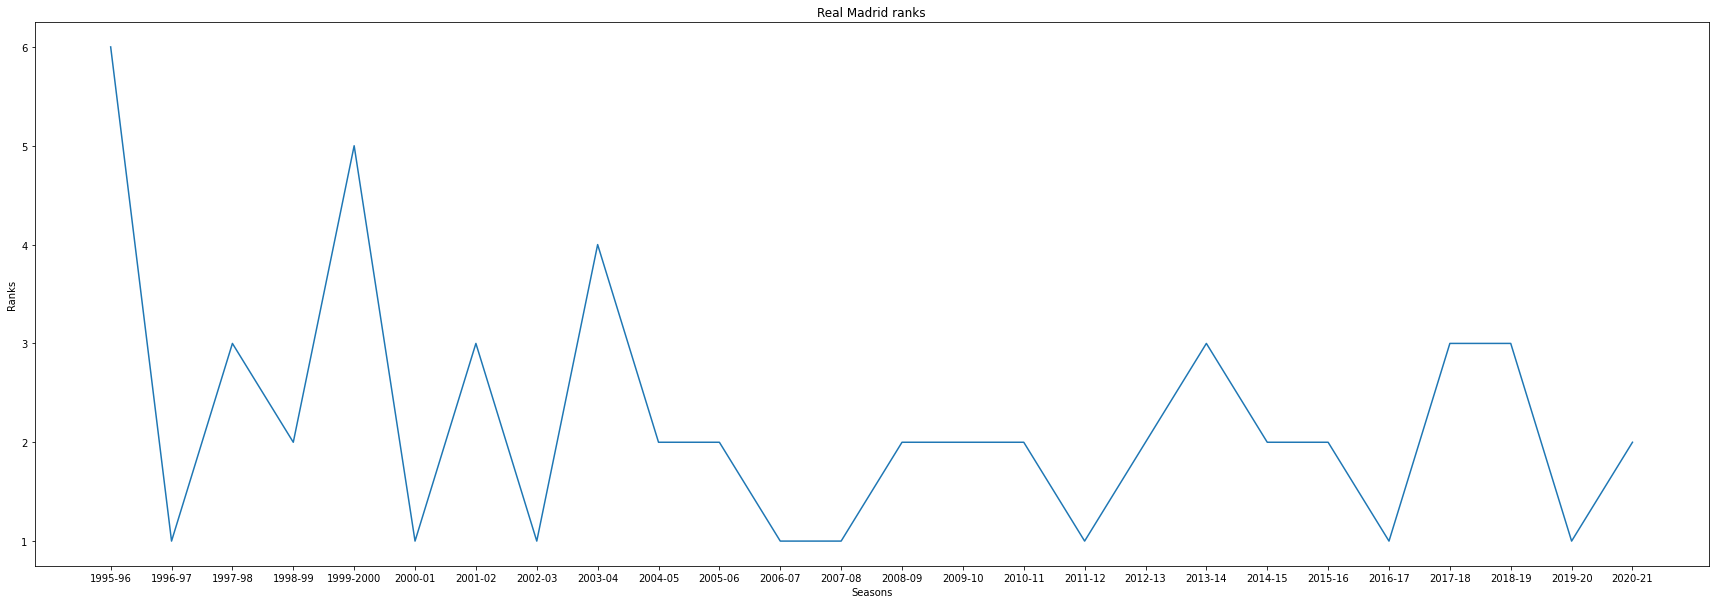

In [22]:
def show_rm_rank_chart(season,ranks):
    plt.figure(figsize=(30, 10))
    plt.plot(season, ranks)
    plt.title('Real Madrid ranks')
    plt.xlabel('Seasons')
    plt.ylabel('Ranks')
    plt.show()




def compare(first_team,second_team,teams,tb,games):
            
            first_team_result = 0
            second_team_result = 0
            
            # Search for games hosted by the first team
            f_ftfg = games.loc[(games['HomeTeam'] == first_team) & (games['AwayTeam'] == second_team)]
            
             # Conditions for determining the winning team
            if 'A' in f_ftfg.values :
                first_team_result += 1
            elif  'H' in f_ftfg.values:
                second_team_result += 1
            elif 'D' in f_ftfg.values:
                second_team_result += 0
                first_team_result += 0
                
            else:
                pass

            
            
            # Search for games hosted by the second team
            s_ftfg = games.loc[(games['HomeTeam'] == second_team) & (games['AwayTeam'] == first_team)]
            
            # Conditions for determining the winning team
            if 'A' in s_ftfg.values:
                second_team_result += 1
            elif 'H' in s_ftfg.values:
                first_team_result += 1
            elif 'D' in s_ftfg.values:
                second_team_result += 0
                first_team_result += 0
                pass
            else:
                pass

            # Compare result
            if first_team_result > second_team_result:
                teams.remove(first_team)
            elif first_team_result < second_team_result:
                teams.remove(second_team)
                
            # if their result was equal,check differences
            elif first_team_result == second_team_result:      
                ft_difference = tb.loc[(tb['Teams'] == first_team)]['Difference']
                st_difference = tb.loc[(tb['Teams'] == second_team)]['Difference']    
                if ft_difference.values > st_difference.values:
                    teams.remove(second_team)
                elif ft_difference.values < st_difference.values:
                    teams.remove(first_team)
                else:
                    pass
            else:
                pass
            # Return the winning team
            return teams




def champ_in_each_season():
    
    champs = []
    seasons = df.Season.unique().tolist()
    realmadrid_ranks = []
    # Search in each season
    for season in seasons:
        data = {}
        PTS = []
        Difference = []
        
        # Getting games for each season
        games = df.loc[df['Season'] == str(season)]
        
        # Getting teams for each season
        teams = games['HomeTeam'].unique().tolist()
        teams.sort()
        
        # compute for ranking
        for team in teams:
            
            scores = 0
            home_games = games.loc[games['HomeTeam'] == team]
            guest_games = games.loc[games['AwayTeam'] == team]
            FTHG = sum(home_games['FTHG']) + sum(guest_games['FTHG'])
            FTAG = sum(home_games['FTAG']) + sum(guest_games['FTAG'])
            difference = FTHG - FTAG
            
            # Three points for each wining game at home or away.
            # One point to equalize.
            scores += (len(home_games.loc[home_games['FTR'] == 'H'])) * 3
            scores += len(home_games.loc[home_games['FTR'] == 'D']) 
            scores += (len(guest_games.loc[guest_games['FTR'] == 'A'])) * 3
            scores += len(guest_games.loc[guest_games['FTR'] == 'D'])
            PTS.append(scores)
            Difference.append(difference)
           
        # data for creating new dataframe
        data = {
        'Season': season,
        'Teams': teams,
        'PTS': PTS,
        'Difference': Difference,
        }
        
        # index for ranking start from 1 to lenght of teams in each season
        index = [x for x in range(1,len(teams)+1)]
        
        tb = pd.DataFrame(data,index=index)  
        tb.reset_index(drop=True)
        tb = tb.sort_values(by=['PTS','Difference'],ascending=False)
        tb['rank'] = index
        tb.set_index('rank')
        
        # Search for highest point to check the same points for first place
        highest_point = tb.iloc[0]['PTS']
        
        # Teams have equal points with all info
        Equal_in_points = tb.loc[(tb['PTS'] == highest_point)]
        
        # compare teams
        # conditions are for check the same team in points in list
        if len(Equal_in_points) == 1:
            # if true the champion is determined
            champs.append(tb.iloc[0])
            tb.sort_values(by=['rank'],ascending=False)
        
            # Rank of real madrid
            realmadrid_rank = tb.loc[tb['Teams'] == 'Real Madrid','rank'].tolist()
            realmadrid_ranks.append(realmadrid_rank[0])
            
        else:
            
            # this list just contains name of teams
            teams = Equal_in_points['Teams'].unique().tolist()
            
            # Repeat comparison
            for i in range(len(teams)-(1)):
                winner_team = compare(first_team=teams[0],second_team=teams[1],teams=teams,tb=tb,games=games)
                # after comaring If the list size was equal to one, champion is specified
                if len(teams) == 1 :
                     
                    team =winner_team[0]
                    tb.sort_values(by=['rank'],ascending=False)
                    get_rank = tb.loc[tb['Teams'] == team,'rank'].tolist()
                    get_rank = get_rank[0]
                    get_index = tb.index[tb['rank'] == get_rank ].tolist()
                    index = get_index[0]
                    
                    
                    champs.append(tb.iloc[get_rank-1])
                     # Rank of real madrid
                    realmadrid_rank = tb.loc[tb['Teams'] == 'Real Madrid','rank'].tolist()
                    
                    realmadrid_ranks.append(realmadrid_rank[0]-1)
                    
    
    # for appending in new Dataframe
    season = []
    teams = []
    PTS = []
    Difference = []
    for i in range(0,26):
        season.append(champs[i][0])
        teams.append(champs[i][1])
        PTS.append(champs[i][2])
        Difference.append(champs[i][3])
        
        
      
    data = {
        'Season': season,
        'Teams': teams,
        'PTS': PTS,
        'Difference': Difference,
        }

    
#     return show_rm_rank_chart(season,realmadrid_ranks)
    DataFrame = pd.DataFrame(data)
    # Sorting according to season from 1995 to 2021
    DataFrame = DataFrame.sort_values(by=['Season'],ascending=False)
    
    # teams with Number of championships 
    list_of_teams_championship =  DataFrame['Teams'].value_counts()
    list_of_teams_championship = list_of_teams_championship.reset_index().values.tolist()
    teams = []
    number_of_champs = []
    
    # looping for sperading teams and number of championship for ploting
    for i in list_of_teams_championship:
        teams.append(i[0])
        number_of_champs.append(i[1])
    
    return show_rm_rank_chart(season,realmadrid_ranks)
    

            
champ_in_each_season()

# Q3

ابتدا دیتاهای مورد نظر یعنی بازی های که تفاضل گل تیم ها در نیمه اول 2 است را در یک دیتافرم جدید میریزیم سپس از این دیتاهای جدید تعداد آن هایی را که مطابق شرط صورت سوال است را به دست می آوریم و برای به دست آوردن احتمال تقسیم بر مجموع تعداد بازی های دیتافرم ساخته شده میکنیم 

In [23]:
# variable count for sum of winners
count = 0
# variable allG for all of the games mentioned in the question
allG = 0

# creat new dataframes
newDF_H = data[data['HTHG'] - data['HTAG'] == 2]

newDF_A = data[data['HTHG'] - data['HTAG'] == -2]

allG = newDF_H.shape[0] + newDF_A.shape[0]

count = newDF_H[newDF_H['FTR'] == 'H'].shape[0] + newDF_A[newDF_A['FTR'] == 'A'].shape[0]

# print the posibility
print(count/allG)

0.9107438016528926


# Q4

برای این سوال تاریخ هارا در نظر گرفتم و اگر 13 ام ماه جمعه بود و تیم میزبان باخته بود حالت مطلوب سوال به دست می آمد

In [48]:
import calendar
allOf = 0
lose = 0
notwinner = 0
arr1 = data.loc[:,'Date'].tolist()
arr2 = data.loc[:,'FTR'].tolist()
for date in data['Date']:
    split = date.split('/')
    if (int(split[0])==13):
        if calendar.weekday(int(split[2]), int(split[1]), int(split[0]))==4:
            index = arr1.index(date)
            allOf += 1
            if (arr2[index]=='A'):
                lose += 1
            if (arr2[index]=='A' or arr2[index]=='D'):
                notwinner += 1
                
# lose in friday

print('Lose : ',lose/allOf)

# not be winner

print('Not be winner : ',notwinner/allOf)

Lose :  0.25
Not be winner :  0.75
